In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from sklearn.linear_model import LinearRegression

In [3]:
# Splitting data into training/testing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [4]:
# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error

In [5]:
# Distributions
import scipy

In [14]:
df = pd.read_csv('C:\\Users\\Vijay\\Downloads\\studentst.csv')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


### Cleaning Data

### Using Heatmap we can see better the missing values if present

In [15]:
df.isnull().any()

school        False
sex           False
age           False
address       False
famsize       False
Pstatus       False
Medu          False
Fedu          False
Mjob          False
Fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
Dalc          False
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
dtype: bool

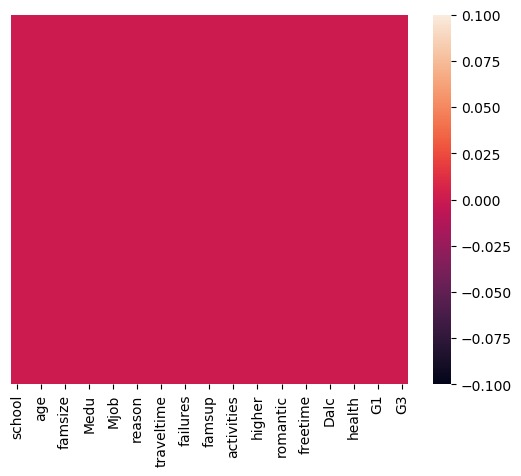

In [16]:
import seaborn as sns
sns.heatmap(df.isnull(), yticklabels=False)

In [17]:
df.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944,-0.093040,-0.153198,-0.117142
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700,0.160612,0.135880,0.097820
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,-0.354718,-0.355896,-0.360415
famrel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354,0.022168,-0.018281,0.051363
freetime,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078,0.012613,-0.013777,0.011307
goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302,-0.149104,-0.162250,-0.132791
Dalc,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908,-0.094159,-0.064120,-0.054660


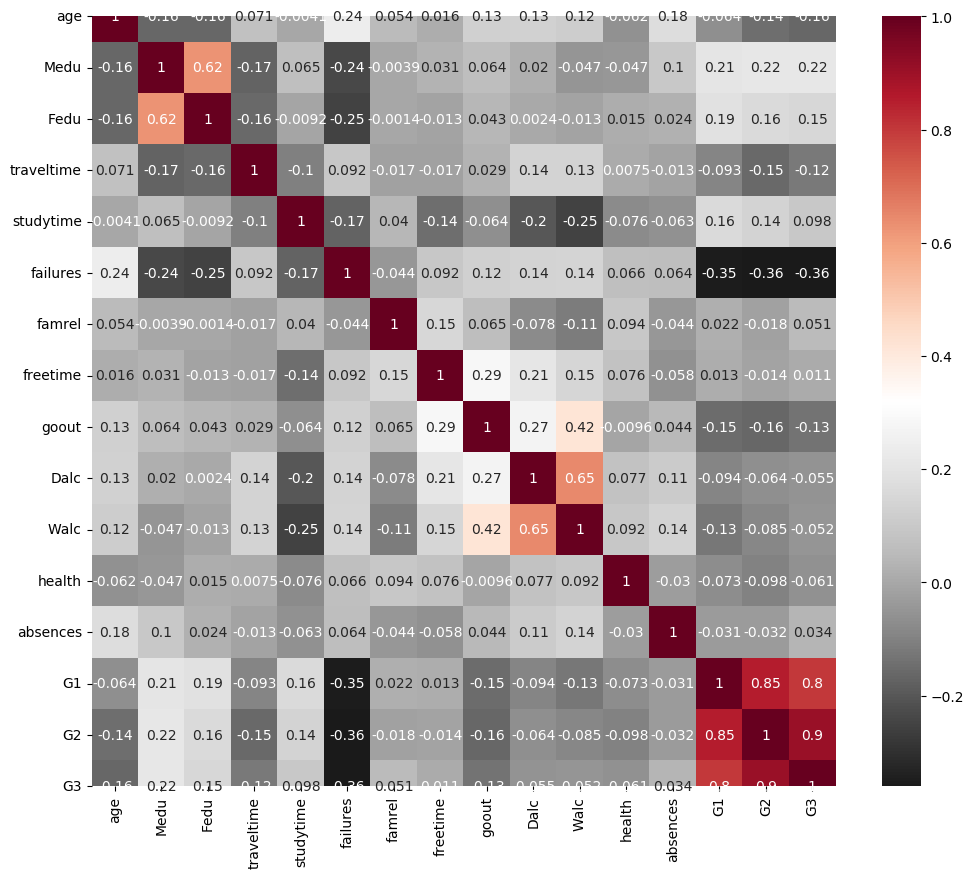

In [18]:
import seaborn as sns
import matplotlib.cm as cm
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.RdGy_r)
plt.show()

#### As both the features are Derived feature we cannot drop them

In [19]:
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

### Grades according to the number of students who scored them

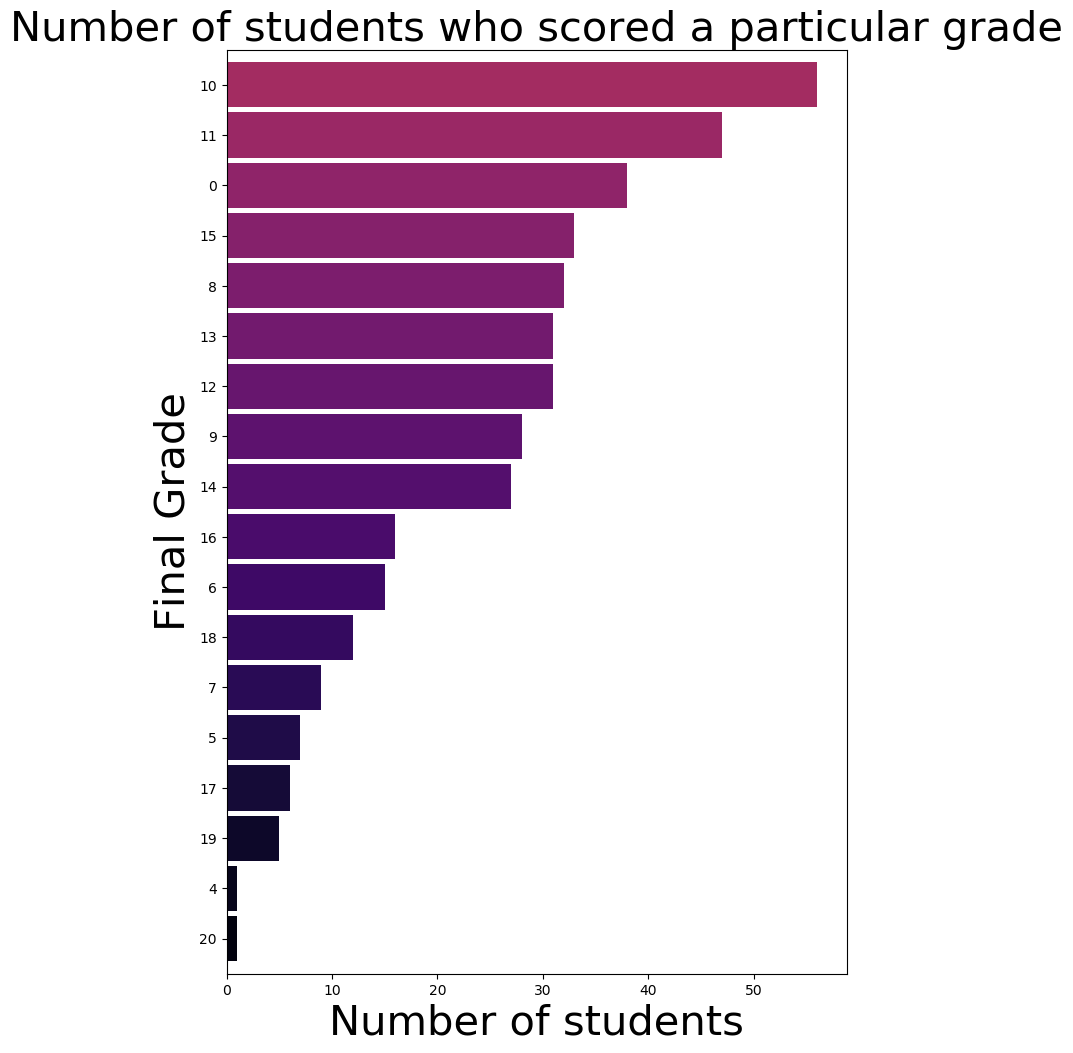

In [21]:
plt.subplots(figsize=(8,12))
grade_counts = df['G3'].value_counts().sort_values().plot.barh(width=.9,color=sns.color_palette('inferno',40))
grade_counts.axes.set_title('Number of students who scored a particular grade',fontsize=30)
grade_counts.set_xlabel('Number of students', fontsize=30)
grade_counts.set_ylabel('Final Grade', fontsize=30)
plt.show()

### Final grade distribution


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


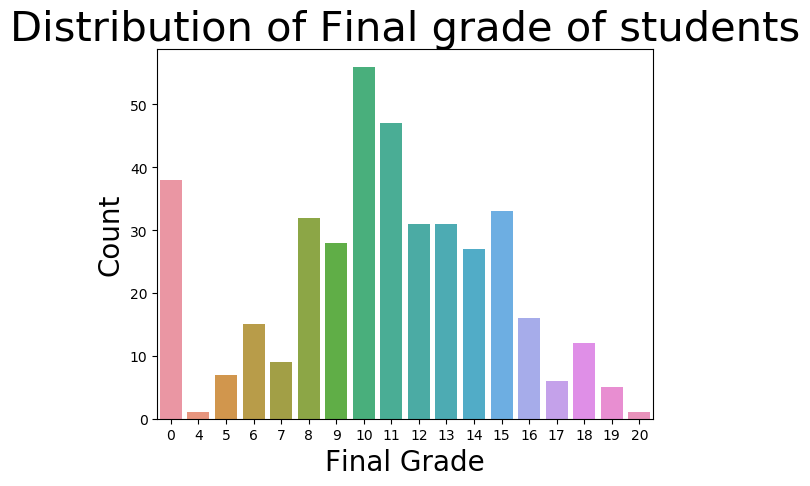

In [23]:
b = sns.countplot(df['G3'])
b.axes.set_title('Distribution of Final grade of students', fontsize = 30)
b.set_xlabel('Final Grade', fontsize = 20)
b.set_ylabel('Count', fontsize = 20)
plt.show()

In [24]:
df.corr()['G3'].sort_values()

failures     -0.360415
age          -0.161579
goout        -0.132791
traveltime   -0.117142
health       -0.061335
Dalc         -0.054660
Walc         -0.051939
freetime      0.011307
absences      0.034247
famrel        0.051363
studytime     0.097820
Fedu          0.152457
Medu          0.217147
G1            0.801468
G2            0.904868
G3            1.000000
Name: G3, dtype: float64

### Encoding categorical variables
#### A machine learning model cannot deal with categorical variables (except for some models). Therefore we need to find a way to encode them (represent as numbers) before handing them to the model.

### Although G1 and G2 which are period grades of a student and are highly correlated to the final grade G3, we drop them. It is more difficult to predict G3 without G2 and G1, but such prediction is much more useful because we want to find other factors affect the grade.

In [47]:


# One-Hot Encoding of Categorical Variables
df = pd.get_dummies(df)

# Find correlations with the Grade
most_correlated = df.corr().abs()['G3'].sort_values(ascending=False)

# Maintain the top 8 most correlation features with Grade
most_correlated = most_correlated[:9]
most_correlated

G3             1.000000
failures       0.360415
Medu           0.217147
higher_yes     0.182465
higher_no      0.182465
age            0.161579
Fedu           0.152457
goout          0.132791
romantic_no    0.129970
Name: G3, dtype: float64

In [49]:
df = df.loc[:, most_correlated.index]
df.head()

,G3,failures,Medu,higher_yes,higher_no,age,Fedu,goout,romantic_no
0,6,0,4,1,0,18,4,4,1
1,6,0,1,1,0,17,1,3,1
2,10,3,1,1,0,15,1,2,1
3,15,0,4,1,0,15,2,2,0
4,10,0,3,1,0,16,3,2,1


### Now we will analyse these variables and then train Linear Regression Model


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 44.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


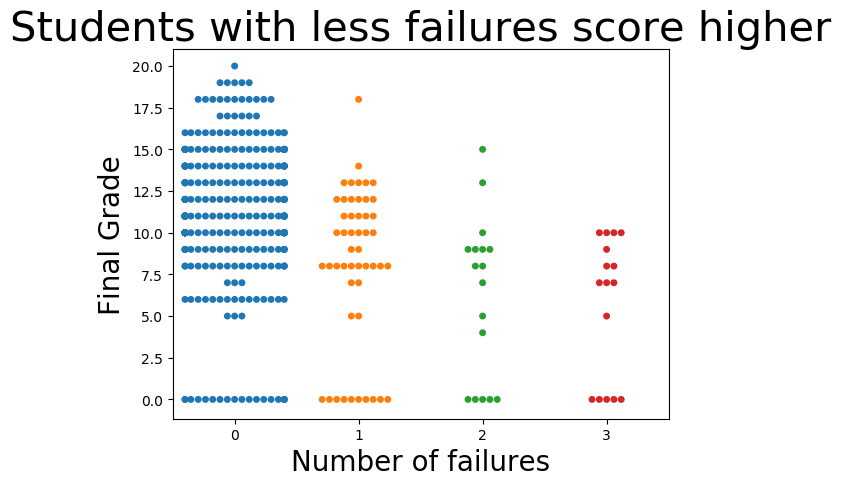

In [51]:
b = sns.swarmplot(x=df['failures'],y=df['G3'])
b.axes.set_title('Students with less failures score higher', fontsize = 30)
b.set_xlabel('Number of failures', fontsize = 20)
b.set_ylabel('Final Grade', fontsize = 20)
plt.show()

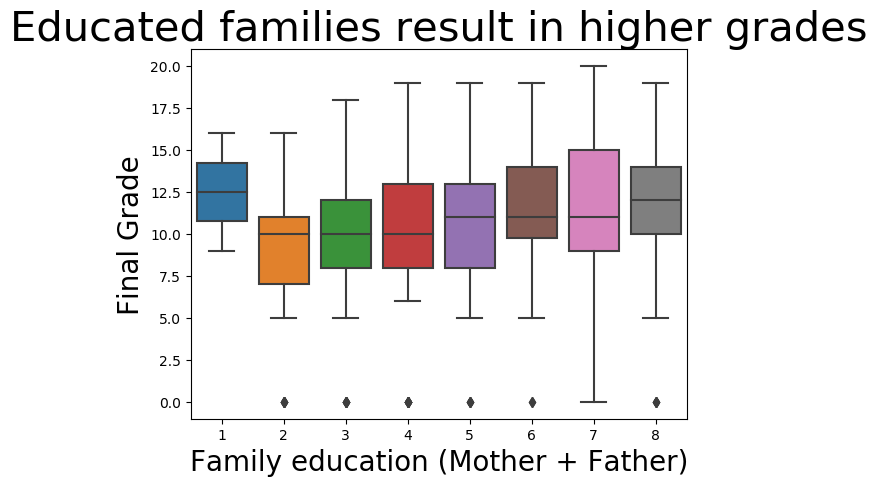

In [53]:
family_ed = df['Fedu'] + df['Medu'] 
b = sns.boxplot(x=family_ed,y=df['G3'])
b.axes.set_title('Educated families result in higher grades', fontsize = 30)
b.set_xlabel('Family education (Mother + Father)', fontsize = 20)
b.set_ylabel('Final Grade', fontsize = 20)
plt.show()

In [55]:
# splitting the data into training and testing data (75% and 25%)
# we mention the random state to achieve the same split everytime we run the code
X_train, X_test, y_train, y_test = train_test_split(df, labels, test_size = 0.25, random_state=42)

In [56]:
X_train.head()

,G3,failures,Medu,higher_yes,higher_no,age,Fedu,goout,romantic_no
16,14,0,4,1,0,16,4,3,1
66,12,0,4,1,0,15,4,3,0
211,13,0,4,1,0,17,4,5,0
7,6,0,4,1,0,17,4,4,1
19,10,0,4,1,0,16,3,3,1


In [66]:
def evaluate_predictions(predictions, true):
    mae = np.mean(abs(predictions - true))
    rmse = np.sqrt(np.mean((predictions - true) ** 2))
    
    return mae, rmse

In [67]:
# find the median
median_pred = X_train['G3'].median()

# create a list with all values as median
median_preds = [median_pred for _ in range(len(X_test))]

# store the true G3 values for passing into the function
true = X_test['G3']

In [70]:
### Display the naive baseline metrics
mb_mae, mb_rmse = evaluate_predictions(median_preds, true)
print('Median Baseline  MAE: {:.4f}'.format(mb_mae))
print('Median Baseline RMSE: {:.4f}'.format(mb_rmse))

Median Baseline  MAE: 3.7879
Median Baseline RMSE: 4.8252


In [73]:
# Evaluate several ml models by training on training set and testing on testing set
def evaluate(X_train, X_test, y_train, y_test):
    # Names of models
    model_name_list = ['Linear Regression']
    X_train = X_train.drop('G3', axis='columns')
    X_test = X_test.drop('G3', axis='columns')
    
    # Instantiate the models
    model1 = LinearRegression()
    
    # Dataframe for results
    results = pd.DataFrame(columns=['mae', 'rmse'], index = model_name_list)
    
    # Train and predict with each model
    for i, model in enumerate([model1]):
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        
        # Metrics
        mae = np.mean(abs(predictions - y_test))
        rmse = np.sqrt(np.mean((predictions - y_test) ** 2))
        
        # Insert results into the dataframe
        model_name = model_name_list[i]
        results.loc[model_name, :] = [mae, rmse]
    
    
    return results

In [74]:
results = evaluate(X_train, X_test, y_train, y_test)
results

,mae,rmse
Linear Regression,3.51289,4.45104
